# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Stephanie Vivienne Tantiyo
- **Email:** 6162001010@student.unpar.ac.id
- **ID Dicoding:** stephanievivienne

Data yang digunakan adalah Bike Sharing Dataset. Data tersebut berisikan kumpulan statistik yang mencakup jumlah penyewaan sepeda per jam dan per hari di antara rentang waktu tahun 2011 hingga 2012. Data ini dikumpulkan dari sistem Capital Bikeshare yang beroperasi di Washington, DC. Selain itu, dataset ini juga mencakup informasi yang berkaitan dengan kondisi cuaca serta faktor musiman yang relevan. Dengan demikian, dataset ini memberikan gambaran komprehensif tentang tren penggunaan layanan sepeda sewaan di kota Washington, DC selama dua tahun tersebut, serta bagaimana faktor-faktor eksternal seperti cuaca dan musim memengaruhi pola penggunaan sepeda.

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan kondisi cuaca dengan jumlah rata-rata penyewaan sepeda?
- Bagaimana hubungan hari libur tertentu yang terkait dengan kenaikan atau penurunan rata-rata penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

Pertama-tama, akan diimpor seluruh package atau library yang digunakan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Akan dilakukan pembentukan variabel 'data_df' yang memuat informasi dari sebuah file sumber data yang disimpan dalam format file .csv.

In [2]:
data_df = pd.read_csv("https://raw.githubusercontent.com/stephanievivienne/bikedataset/main/day.csv")
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data2_df = pd.read_csv("https://raw.githubusercontent.com/stephanievivienne/bikedataset/main/hour.csv")
data2_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Proses penilaian data melibatkan mengidentifikasi potensi masalah dalam dataset dan memastikan kualitas data yang baik. Langkah awalnya adalah memperoleh informasi mengenai jenis data dari setiap variabel dalam kumpulan data.

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Langkah selanjutnya adalah mencari variabel yang kosong atau tidak memiliki nilai. Beberapa variabel telah ditemukan tanpa nilai, sebagaimana yang terlihat dalam hasil berikut:

In [6]:
data_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data2_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah itu, dilakukan perhitungan jumlah duplikasi data. Hasilnya menunjukkan bahwa tidak ada data yang memiliki duplikasi.

In [8]:
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
print("Jumlah duplikasi: ", data2_df.duplicated().sum())

Jumlah duplikasi:  0


Kemudian akan ditampilkan parameter statistik dari masing-masing variabel.

In [10]:
data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
data2_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

In [12]:
data_df.drop_duplicates(inplace=True)

In [13]:
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
data2_df.drop_duplicates(inplace=True)

In [15]:
print("Jumlah duplikasi: ", data2_df.duplicated().sum())

Jumlah duplikasi:  0


Proses penghapusan duplikasi berjalan lancar, dapat dilihat bahwa dihasilkan output yang menunjukkan tidak adanya duplikasi pada data_df.

Kemudian dilakukan pengisian parameter variabel yang kosong.

In [16]:
data_df.fillna(method = "ffill", inplace=True)

In [17]:
data2_df.fillna(method = "ffill", inplace=True)

Lalu, akan dilakukan pengecekan kembali elemen variabel yang kosong.

In [18]:
data_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
data2_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore data_df

Berikut merupakan tampilan 5 data acak setelah proses data wrangling.

In [20]:
data_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
204,205,2011-07-24,3,0,7,0,0,0,1,0.830000,0.794829,0.550833,0.169171,1050,2556,3606
584,585,2012-08-07,3,1,8,0,2,1,2,0.735833,0.697621,0.703750,0.116908,1278,5995,7273
127,128,2011-05-08,2,0,5,0,0,0,1,0.528333,0.518933,0.631667,0.074637,1401,2932,4333
336,337,2011-12-03,4,0,12,0,6,0,1,0.299167,0.310604,0.612917,0.095783,706,2908,3614
585,586,2012-08-08,3,1,8,0,3,1,2,0.750000,0.707717,0.672917,0.110700,1263,6271,7534


Akan dilakukan penggabungan dataframe dari data1 (day) dan data2 (hour).

In [21]:
bike_df = data2_df.merge(data_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Akan ditambahkan label pada weather.

In [22]:
weather_labels = {
    1: 'Jernih',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}

bike_df['weather_label'] = bike_df['weathersit_day'].map(weather_labels)

Akan ditunjukan rangkuman statistik deskriptif dari DataFrame data_df.






In [23]:
bike_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jernih
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


Akan dikelompokkan data dalam DataFrame bike_df berdasarkan kolom 'weather_label'.

In [24]:
bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,weather_label,cnt_day
0,Curah Hujan Ringan,1914.700855
2,Kabut,4062.717595
1,Jernih,4895.177083


Akan dikelompokkan data dalam DataFrame bike_df berdasarkan kolom 'hr' (jam).

In [25]:
bike_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Akan dikelompokkan data dalam DataFrame bike_df berdasarkan kolom 'holiday_day' (hari libur).

In [26]:
bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


Terakhir, akan dijumlahkan nilai dalam kolom 'registered_hour' dari DataFrame bike_df. Berikut merupakan total jumlah jam pendaftaran sepeda yang tercatat dalam data.

In [27]:
bike_df.registered_hour.sum()

2672662

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana hubungan kondisi cuaca dengan jumlah rata-rata penyewaan sepeda?

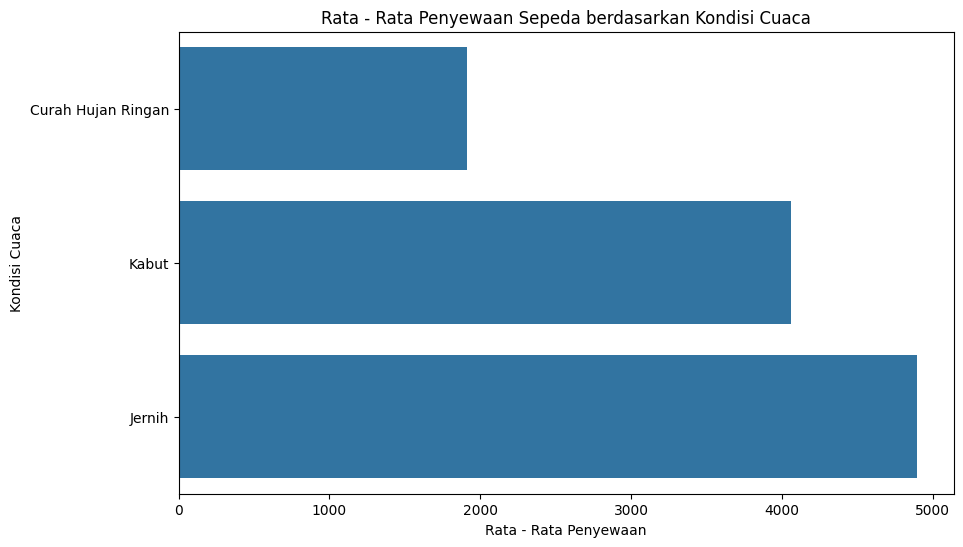

In [64]:
avg_weather = bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weather_label', data=avg_weather)

plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Rata - Rata Penyewaan')
plt.ylabel('Kondisi Cuaca')

plt.show()

Berikut merupakan visualisasi data dari rata-rata penyewaan sepeda berdasarkan kondisi cuaca.

Kondisi cuaca memiliki korelasi yang signifikan dengan jumlah rata-rata persewaan sepeda, seperti yang terlihat dalam visualisasi data sebelumnya. Analisis menunjukkan bahwa rata-rata persewaan sepeda mencapai puncaknya pada saat cuaca sedang cerah, sementara jumlah persewaan paling rendah terjadi pada saat cuaca sedang hujan ringan. Hal ini menunjukkan bahwa faktor cuaca secara langsung memengaruhi preferensi pengguna dalam menggunakan layanan persewaan sepeda, di mana kondisi cuaca yang cerah lebih mendorong untuk menggunakan sepeda dibandingkan dengan kondisi cuaca yang kurang mendukung seperti hujan ringan. Hal ini menggambarkan pentingnya faktor cuaca dalam mempengaruhi pola persewaan sepeda dan implikasinya terhadap pengelolaan layanan persewaan sepeda di masa depan.

### Pertanyaan 2:
Bagaimana hubungan hari libur tertentu yang terkait dengan kenaikan atau penurunan rata-rata penyewaan sepeda?

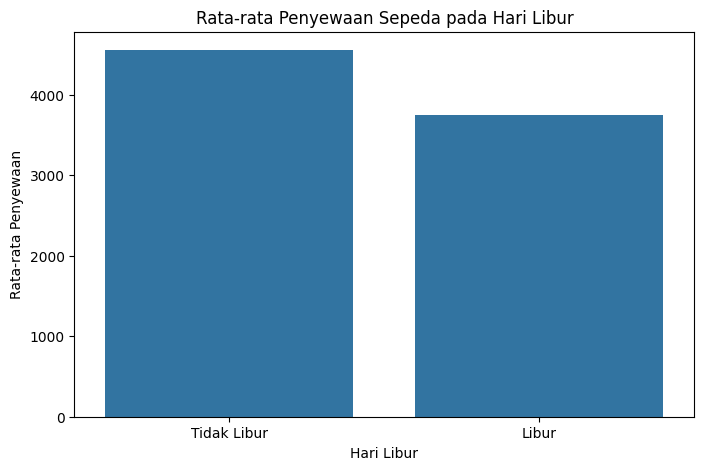

In [65]:
avg_holiday = bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday)

plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'])

plt.show()

Berikut merupakan visualisasi data rata-rata penyewaan sepeda berdasarkan hari libur dan tidak libur.

Analisis menunjukkan bahwa tingkat rata-rata persewaan sepeda cenderung meningkat saat hari-hari kerja, khususnya dari hari Senin hingga Jumat, di mana kegiatan sehari-hari dan rutinitas pekerjaan memainkan peran penting dalam keputusan untuk menggunakan layanan persewaan sepeda. Hal ini menandakan bahwa faktor-faktor seperti komitmen kerja dan kegiatan sehari-hari pada hari-hari kerja memengaruhi pola penggunaan sepeda, dengan adanya kecenderungan untuk menggunakan sepeda sebagai sarana transportasi alternatif selama hari-hari kerja dibandingkan dengan akhir pekan atau hari libur.

<ipython-input-30-34f879511fcb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_df.corr(), annot = True, cmap="RdBu")


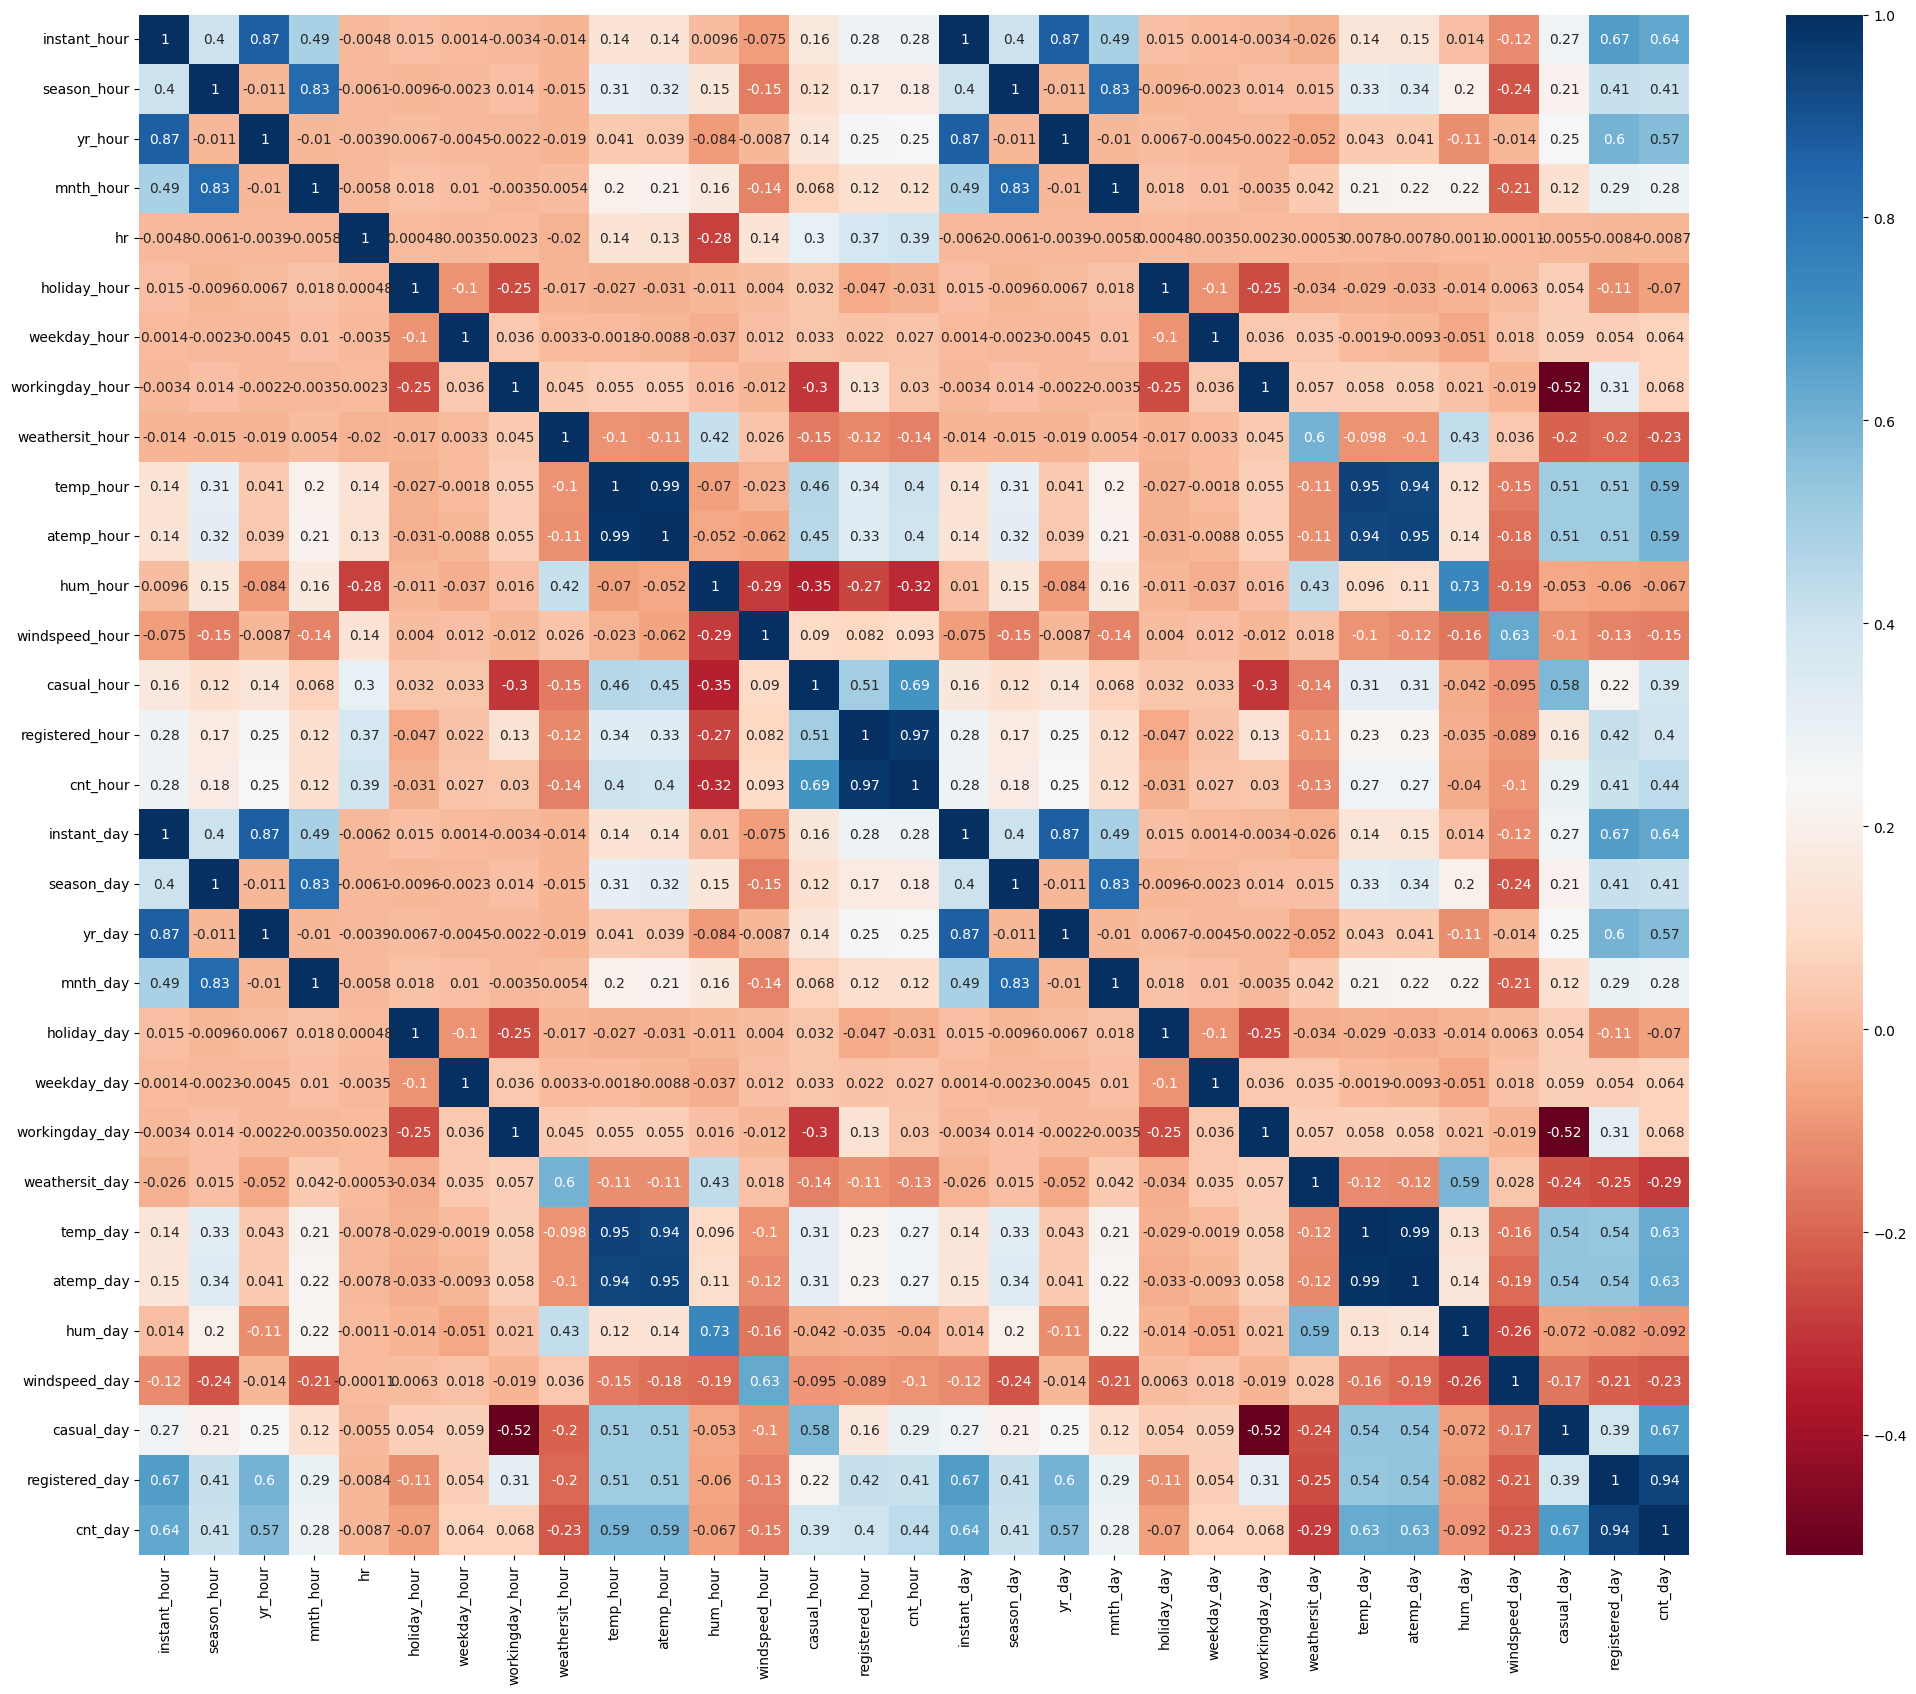

In [30]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_df.corr(), annot = True, cmap="RdBu")
plt.show()

Pada visualisasi tersebut, warna-warna yang berbeda merepresentasikan nilai korelasi antar pasangan variabel. Korelasi yang lebih kuat ditunjukkan dengan warna yang lebih terang, sementara korelasi yang lebih lemah ditampilkan dengan warna yang lebih gelap.

Annotasi (penambahan angka) pada heatmap memberikan informasi tambahan dalam bentuk nilai korelasi untuk setiap pasangan variabel.

Skema warna yang digunakan dalam heatmap adalah skema warna merah-biru (RdBu), di mana warna merah menunjukkan korelasi positif, warna biru menunjukkan korelasi negatif, dan intensitas warna menunjukkan kekuatan korelasi.


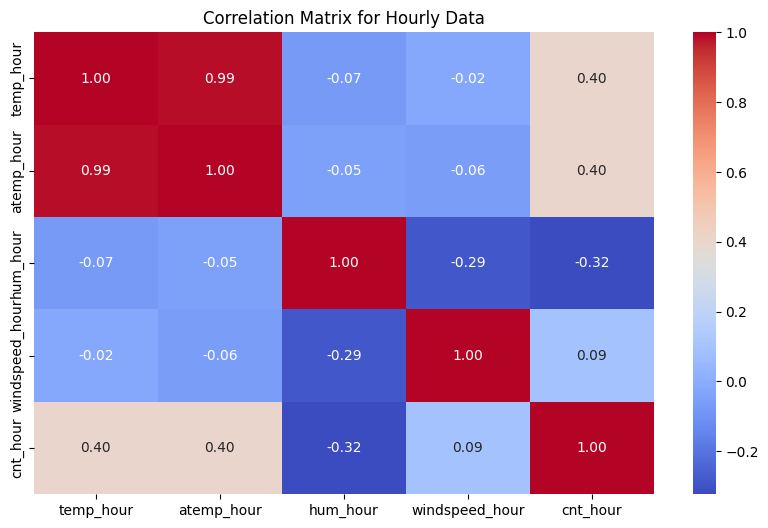

In [80]:
correlation_matrix = bike_df[['temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'cnt_hour']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Hourly Data')
plt.show()

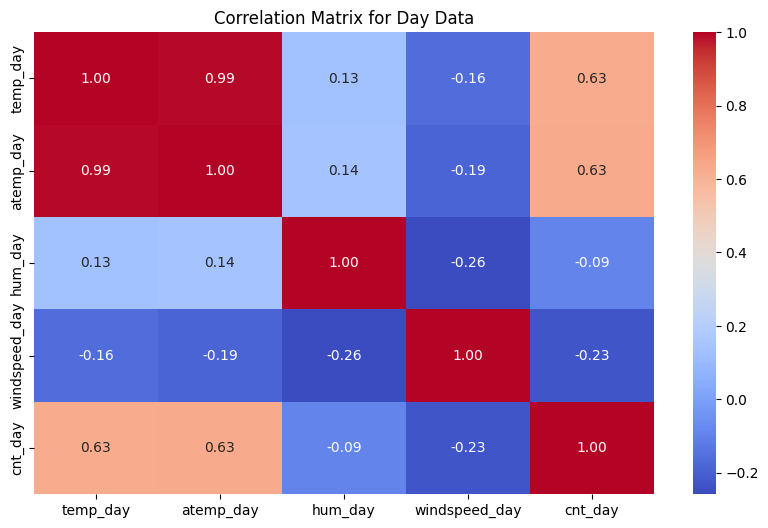

In [81]:
day_correlation_matrix = bike_df[['temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'cnt_day']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(day_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Day Data')
plt.show()

Dari visualisasi di atas, variabel-variabel yang dianalisis adalah temp_hour (suhu), atemp_hour (suhu terasa), hum_hour (kelembapan), windspeed_hour (kecepatan angin), dan cnt_hour (jumlah peminjaman sepeda) pada data per jam.

Heatmap menggunakan skema warna 'coolwarm' untuk memvisualisasikan korelasi antar variabel, di mana warna biru menunjukkan korelasi negatif, warna merah menunjukkan korelasi positif, dan intensitas warna mengindikasikan kekuatan korelasi. Anotasi pada heatmap (dengan parameter annot=True) menambahkan angka pada sel-sel heatmap yang menunjukkan nilai korelasi antar pasangan variabel.

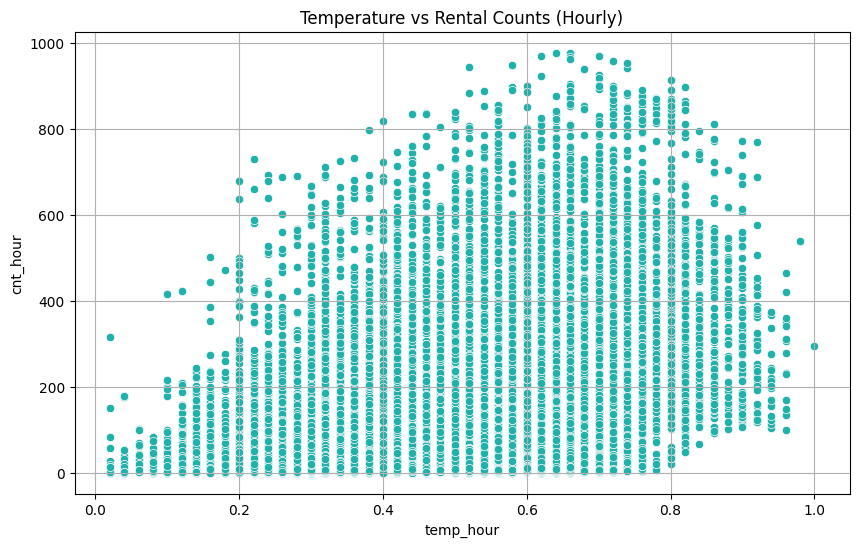

In [79]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_hour', y='cnt_hour', data=bike_df, color='lightseagreen')
plt.title('Temperature vs Rental Counts (Hourly)')
plt.grid()
plt.show()

Scatter plot di atas menampilkan hubungan antara suhu (temp_hour) dan jumlah peminjaman sepeda (cnt_hour) pada data per jam dalam dataset bike_df.

Scatter plot menggunakan sumbu x untuk memvisualisasikan suhu (temp_hour) dan sumbu y untuk memvisualisasikan jumlah peminjaman sepeda (cnt_hour). Setiap titik dalam scatter plot mewakili satu pengamatan, di mana posisi titik menunjukkan nilai suhu dan jumlah peminjaman sepeda untuk pengamatan tersebut.

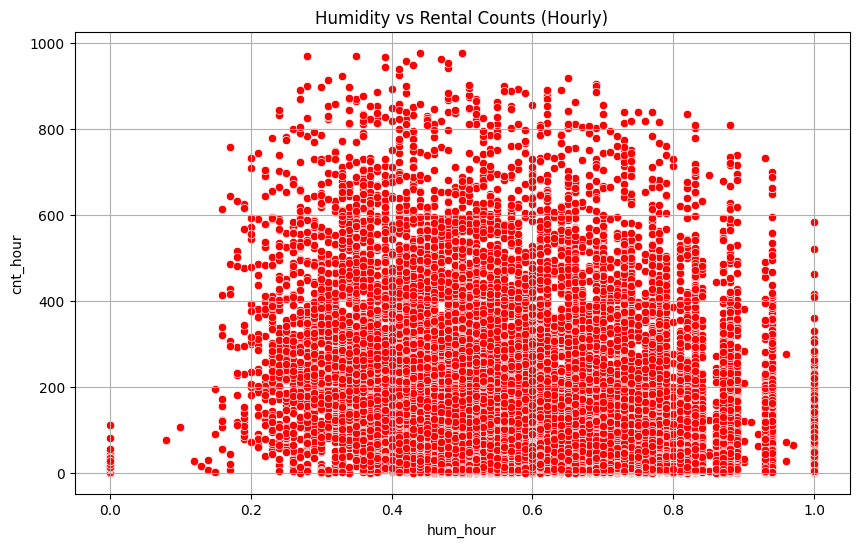

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum_hour', y='cnt_hour', data=bike_df, color='red')
plt.title('Humidity vs Rental Counts (Hourly)')
plt.grid()
plt.show()

Scatter plot di atas menampilkan hubungan antara kelembapan (hum_hour) dan jumlah peminjaman sepeda (cnt_hour) pada data per jam dalam dataset bike_df.

Dalam scatter plot ini, sumbu x digunakan untuk memvisualisasikan nilai kelembapan (hum_hour), sedangkan sumbu y digunakan untuk memvisualisasikan jumlah peminjaman sepeda (cnt_hour). Setiap titik dalam scatter plot mewakili satu pengamatan, dengan posisi titik menunjukkan nilai kelembapan dan jumlah peminjaman sepeda untuk pengamatan tersebut.

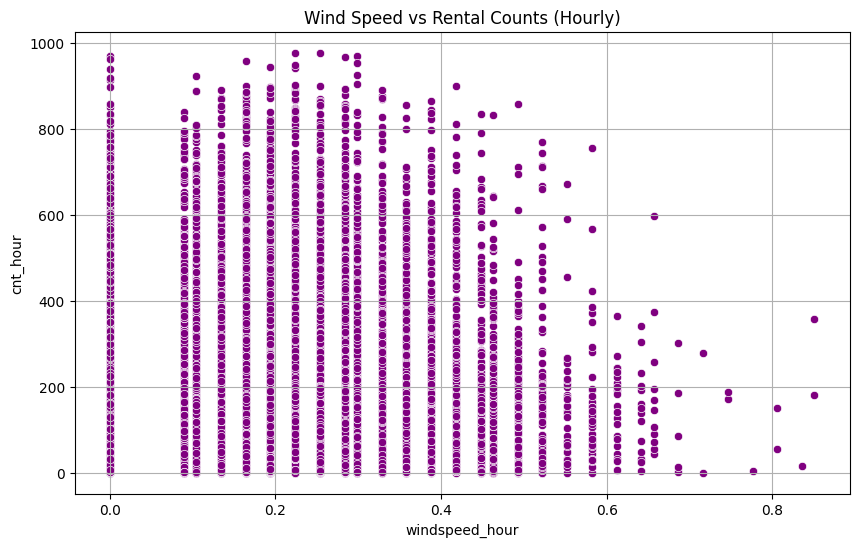

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed_hour', y='cnt_hour', data=bike_df, color='purple')
plt.title('Wind Speed vs Rental Counts (Hourly)')
plt.grid()
plt.show()

Scatter plot di atas menampilkan hubungan antara kecepatan angin (windspeed_hour) dan jumlah peminjaman sepeda (cnt_hour) pada data per jam dalam dataset bike_df.

Dalam scatter plot ini, sumbu x digunakan untuk memvisualisasikan nilai kecepatan angin (windspeed_hour), sedangkan sumbu y digunakan untuk memvisualisasikan jumlah peminjaman sepeda (cnt_hour). Setiap titik dalam scatter plot mewakili satu pengamatan, dengan posisi titik menunjukkan nilai kecepatan angin dan jumlah peminjaman sepeda untuk pengamatan tersebut

<ipython-input-76-cc9f9a328d32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit_hour', y='cnt_hour', data=bike_df, palette='flare')


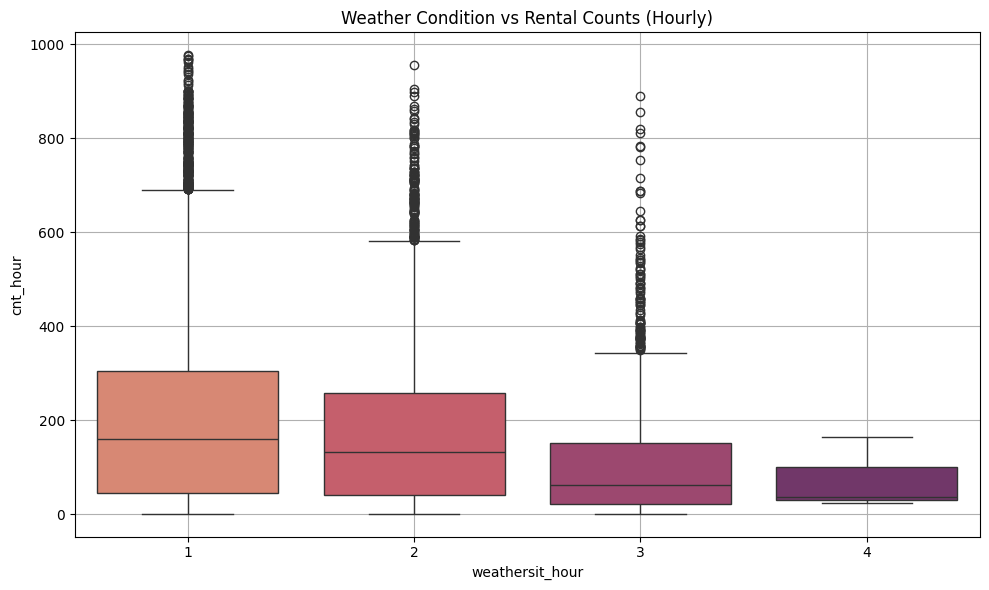

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_hour', y='cnt_hour', data=bike_df, palette='flare')
plt.title('Weather Condition vs Rental Counts (Hourly)')
plt.tight_layout()
plt.grid()
plt.show()

Box plot di atas memperlihatkan hubungan antara kondisi cuaca (weathersit_hour) dan jumlah peminjaman sepeda (cnt_hour) pada data per jam dalam dataset bike_df.

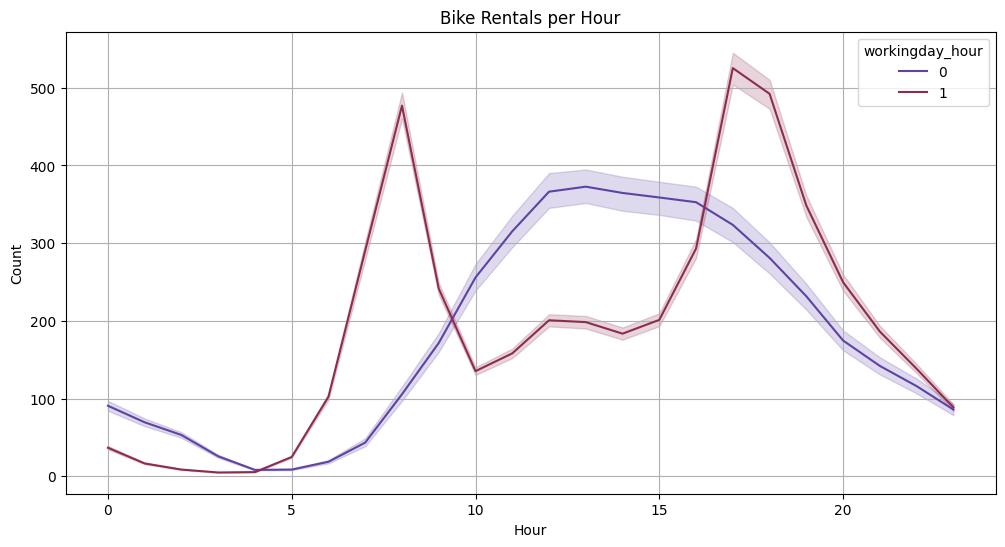

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=bike_df, x='hr', y='cnt_hour', hue='workingday_hour', palette='twilight')
plt.title('Bike Rentals per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid()
plt.show()

Line plot di atas menampilkan jumlah peminjaman sepeda (cnt_hour) per jam (hr) dalam dataset bike_df, dengan pemisahan berdasarkan hari kerja (workingday_hour).

Dalam line plot ini, sumbu x digunakan untuk memvisualisasikan waktu dalam jam (hr), sedangkan sumbu y digunakan untuk memvisualisasikan jumlah peminjaman sepeda (cnt_hour). Setiap garis mewakili jumlah peminjaman sepeda per jam, dengan warna yang berbeda menunjukkan apakah itu pada hari kerja atau bukan.

<ipython-input-61-7a11914743e2>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=bike_df, x='cnt_hour', bins=30, kde=True, palette='crest')


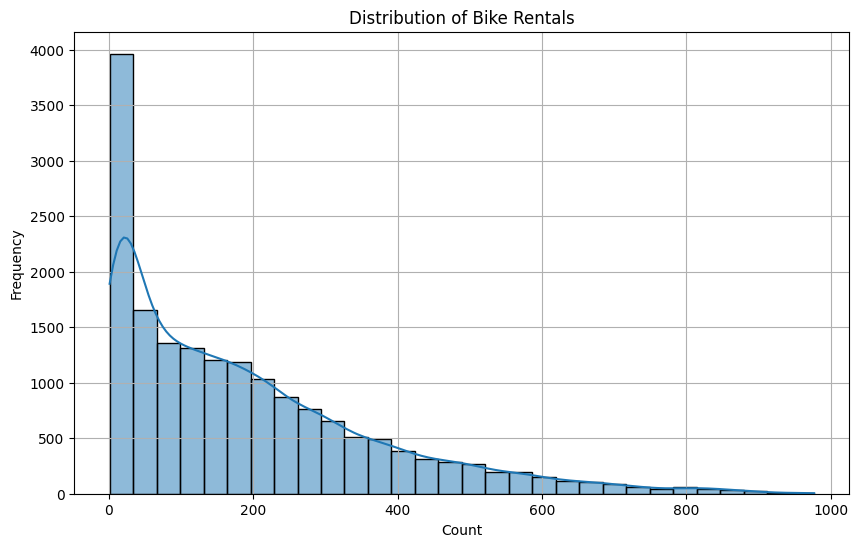

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bike_df, x='cnt_hour', bins=30, kde=True, palette='crest')
plt.title('Distribution of Bike Rentals')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Histogram di ats memperlihatkan distribusi jumlah peminjaman sepeda (cnt_hour) dalam dataset bike_df.

Dalam histogram ini, sumbu x digunakan untuk memvisualisasikan jumlah peminjaman sepeda (cnt_hour), sedangkan sumbu y menunjukkan frekuensi kemunculan nilai tersebut dalam data.

Histogram dibagi menjadi beberapa batang atau "bins" untuk menggambarkan distribusi data. Jumlah bin ditentukan oleh parameter bins, dalam kasus ini diatur menjadi 30. Jika kde=True, garis kepadatan kernel juga akan ditampilkan di atas histogram.

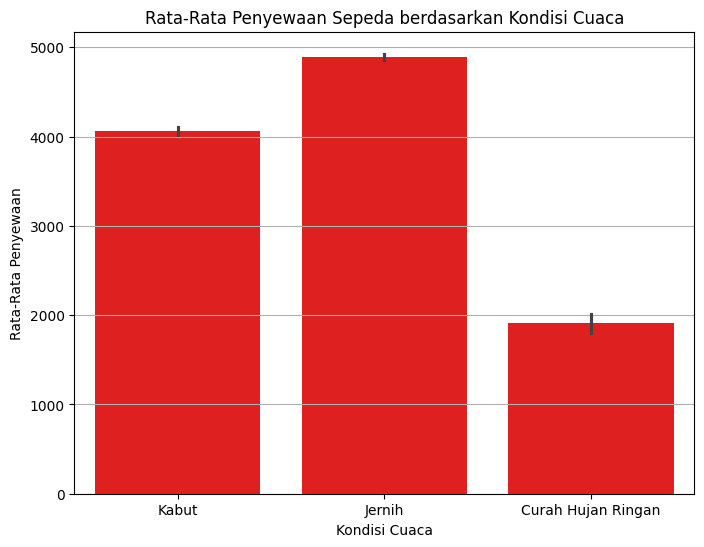

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(x='weather_label', y='cnt_day', data=bike_df, estimator=lambda x: sum(x) / len(x), color='red')
plt.title('Rata-Rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Penyewaan')
plt.grid(axis='y')
plt.show()

Barplot di atas menunjukkan rata-rata penyewaan sepeda berdasarkan kondisi cuaca. Dapat dilihat jika penyewaan sepeda terbanyak terdapat pada kondisi cuaca yang jernih.

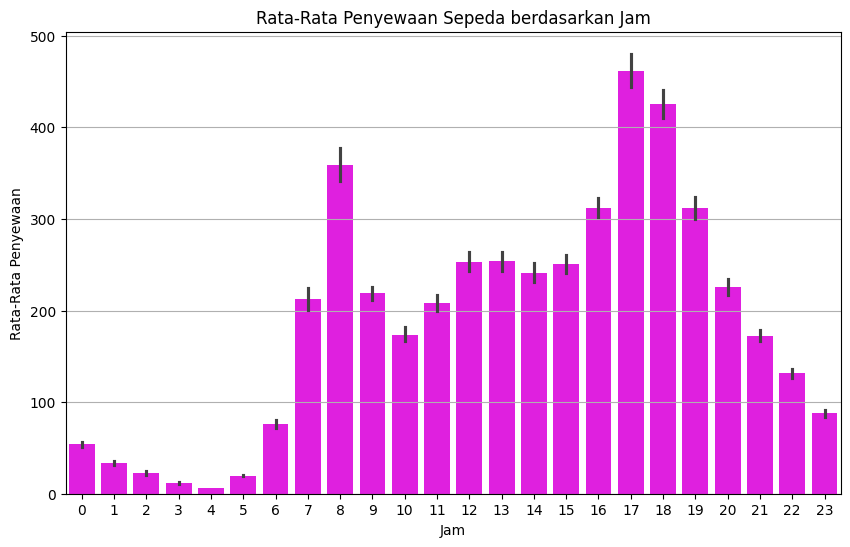

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt_hour', data=bike_df, estimator=lambda x: sum(x) / len(x), color='magenta')
plt.title('Rata-Rata Penyewaan Sepeda berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.grid(axis='y')
plt.show()

Bar plot di atas menampilkan rata-rata jumlah peminjaman sepeda (cnt_hour) berdasarkan jam (hr) dalam dataset bike_df.

Dalam bar plot ini, sumbu x digunakan untuk memvisualisasikan waktu dalam jam (hr), sedangkan sumbu y digunakan untuk memvisualisasikan rata-rata jumlah peminjaman sepeda (cnt_hour). Setiap batang pada plot mewakili rata-rata jumlah peminjaman sepeda pada jam tertentu.

Estimator lambda x: sum(x) / len(x) digunakan untuk menghitung rata-rata, di mana setiap nilai x adalah jumlah peminjaman sepeda pada jam tertentu. Dengan demikian, batang-batang pada plot menunjukkan rata-rata jumlah peminjaman sepeda pada setiap jam.

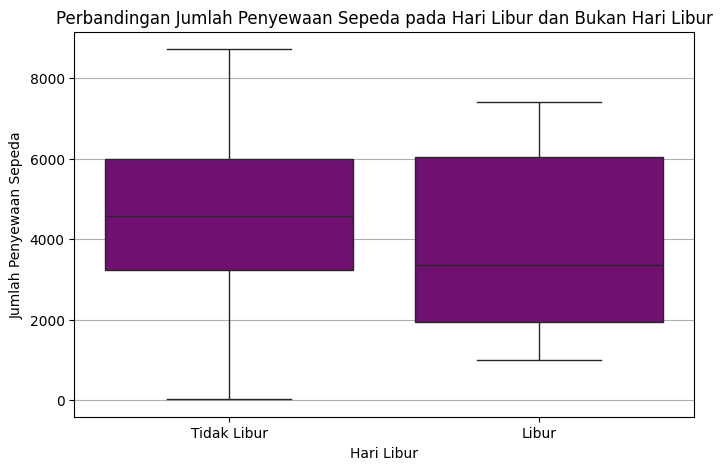

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='holiday_day', y='cnt_day', data=bike_df, color='purple')
plt.title('Perbandingan Jumlah Penyewaan Sepeda pada Hari Libur dan Bukan Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'])
plt.grid(axis='y')
plt.show()

Box plot di atas yang memperlihatkan perbandingan jumlah peminjaman sepeda (cnt_day) antara hari libur dan bukan hari libur dalam dataset bike_df.

Dalam box plot ini, sumbu x digunakan untuk memvisualisasikan kategori 'holiday_day', di mana nilai 0 menunjukkan 'Tidak Libur' dan nilai 1 menunjukkan 'Libur'. Sumbu y digunakan untuk memvisualisasikan jumlah peminjaman sepeda (cnt_day). Kotak pada box plot menunjukkan kuartil data, dengan garis di dalamnya menunjukkan median. Tendangan pada box plot menunjukkan rentang interkuartil (IQR), yang merupakan jangkauan antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Garis-garis eksternal, atau "jengkal", menunjukkan rentang data yang tidak termasuk dalam jangkauan interkuartil, biasanya dua kali IQR. Titik-titik di luar jangkauan ini dianggap sebagai titik-titik yang keluar atau outlier.

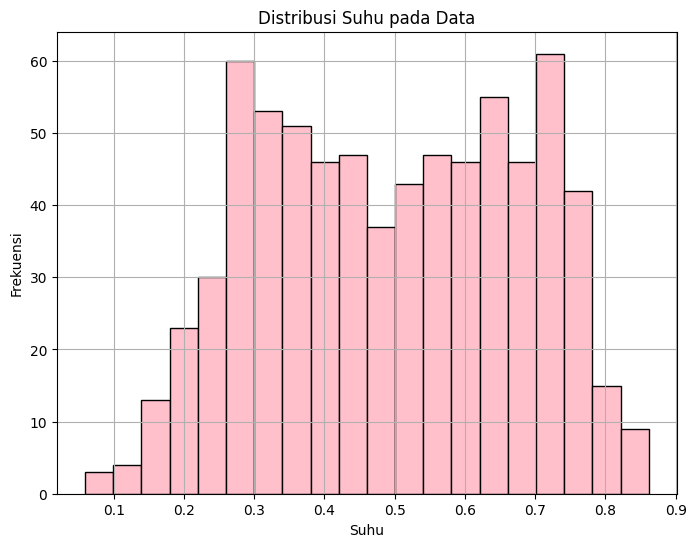

In [71]:
plt.figure(figsize=(8, 6))
plt.hist(data_df['temp'], bins=20, color='pink', edgecolor='black')
plt.title('Distribusi Suhu pada Data')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

Histogram di atas memperlihatkan distribusi suhu pada dataset.

## Conclusion

- Conclution pertanyaan 1:

Hubungan antara kondisi cuaca dan rata-rata persewaan sepeda sangat erat. Terdapat kecenderungan bahwa rata-rata persewaan sepeda lebih tinggi pada saat cuaca cerah, yang mendukung aktivitas di luar ruangan. Hal ini dapat dijelaskan oleh preferensi umum masyarakat untuk melakukan aktivitas bersepeda saat cuaca cerah, karena kondisi tersebut memberikan kenyamanan dan keamanan yang lebih untuk bersepeda. Dalam kondisi cuaca yang mendukung aktivitas di luar ruangan, seperti cuaca cerah, orang cenderung lebih termotivasi untuk menyewa sepeda dan menikmati perjalanan di bawah sinar matahari. Kondisi cuaca yang baik juga meningkatkan minat dan keinginan untuk bersepeda, yang secara langsung berkontribusi pada peningkatan rata-rata persewaan sepeda. Oleh karena itu, dapat disimpulkan bahwa kondisi cuaca memainkan peran penting dalam menentukan tingkat permintaan persewaan sepeda, dengan cuaca cerah cenderung menjadi pendorong utama dalam peningkatan persewaan sepeda.

- Conclution pertanyaan 2:

Tingkat rata-rata persewaan sepeda cenderung meningkat selama hari-hari kerja, khususnya dari Senin hingga Jumat, yang menandakan adanya keterkaitan yang kuat dengan kegiatan harian masyarakat. Fenomena ini mungkin disebabkan oleh tingginya aktivitas transportasi pada hari-hari kerja, di mana orang-orang biasanya melakukan perjalanan ke dan dari tempat kerja mereka. Peningkatan persewaan sepeda pada hari-hari kerja juga mencerminkan pengaruh kegiatan harian yang membutuhkan mobilitas, seperti bekerja, bersekolah, atau berbelanja. Selain itu, dapat disimpulkan bahwa ada kelompok pengguna tertentu, seperti para pekerja atau pelajar, yang secara khusus menggunakan layanan persewaan sepeda pada hari-hari kerja untuk memenuhi kebutuhan transportasi mereka. Oleh karena itu, fenomena ini menunjukkan bahwa tingkat persewaan sepeda secara langsung berkaitan dengan aktivitas harian dan kebiasaan mobilitas masyarakat selama hari-hari kerja.

In [ ]:
bike_df.to_csv("all_data.csv", index=False)

In [ ]:
!conda install --yes --prefix {sys.prefix} streamlit babel

/bin/bash: line 1: conda: command not found


In [ ]:
!pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
pip install streamlit